In [1]:
import sys
sys.path.append('../..')

In [2]:
from torchuq.transform.naive import *
import torch
from torchuq.metric import distribution, quantile, point, interval
from matplotlib import pyplot as plt

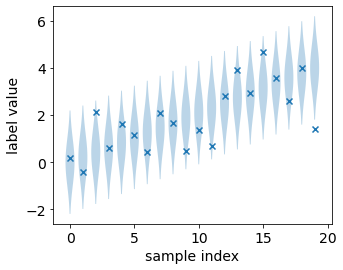

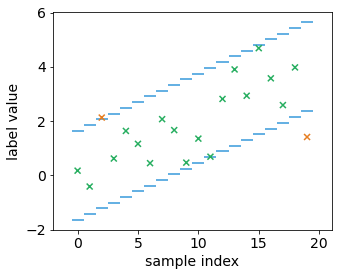

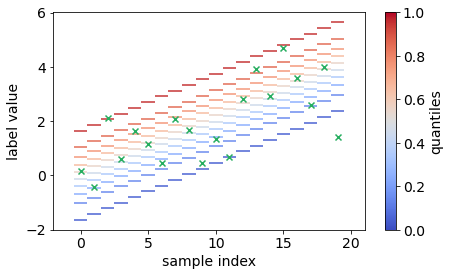

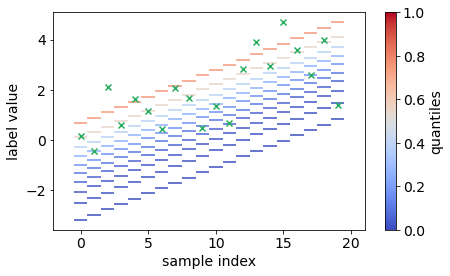

In [12]:
# Convert distribution to other representations
n_pred = 20
pred = Normal(loc=torch.linspace(0, 4, n_pred), scale=torch.ones(n_pred))
labels = pred.sample() 

distribution.plot_density(pred, labels)

pred_interval = distribution_to_interval(pred, confidence=0.9)
interval.plot_intervals(pred_interval, labels)

pred_quantile = distribution_to_quantile(pred, n_quantiles=10)
quantile.plot_quantiles(pred_quantile, labels)

pred_quantile2 = distribution_to_quantile(pred, quantiles=torch.linspace(0, 1, 12)[1:-1].pow(3))   # Get a strange quantile choice to make sure things still work
quantile.plot_quantiles(pred_quantile2, labels)

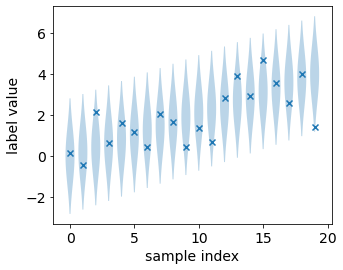

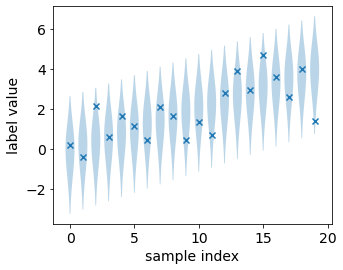

In [13]:
# Convert quantiles back to distributions
dist_recover = quantile_to_distribution(pred_quantile)
distribution.plot_density(dist_recover, labels)

dist_recover2 = quantile_to_distribution(pred_quantile2)
distribution.plot_density(dist_recover2, labels)